In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# We will be working with data coming from the Boston Housing Market
## Our Goal: Use ML to create a regression model 

In [41]:
# Load data from sklearn
X_independent, y_dependent = load_boston(return_X_y=True)

#Turn the Boston Housing Dataset into an array, and then into a dataframe
Boston_np = np.concatenate([X_independent, np.transpose([y_dependent])], axis=1)
Boston_df = pd.DataFrame(Boston_np, columns=['Crime', 'Zone', 'Indus', 'CHAS', 'NOX', 'RM', 
                                                 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BK',
                                            'LSAT', 'MEDV'])
print("""Data Attributes
===============
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highway
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
LSTAT % lower status of the population

Target
======
MEDV Median value of owner-occupied homes in $1000’s


Dataset
=======""")

print(Boston_df)

Data Attributes
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highway
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
LSTAT % lower status of the population

Target
MEDV Median value of owner-occupied homes in $1000’s


Dataset
       Crime  Zone  Indus  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.0

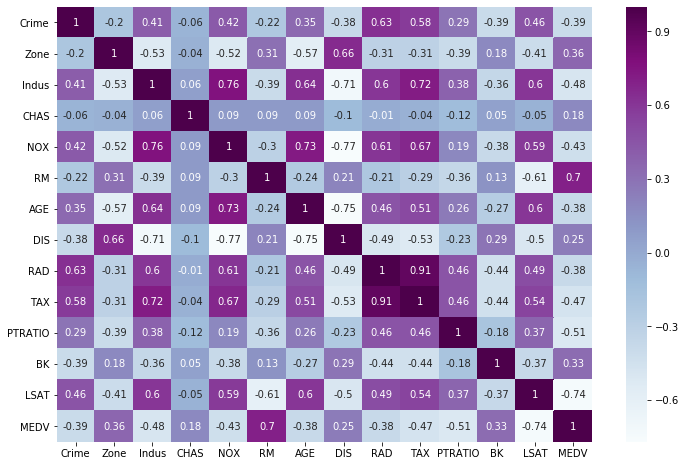

In [90]:
plt.figure(figsize=(12,8))
correlation_matrix = Boston_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='BuPu')

# Split data into training and testing data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Boston_df.drop('MEDV', axis=1), 
                                                    Boston_df['MEDV'], test_size=0.2, 
                                                    random_state=0)

# Linear Regression

In [115]:
reg = LinearRegression().fit(X_train, y_train)

predictions = reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
labels = X_train.columns

print('Mean Squared Error = ', mse )
print('R^2 score = ', r2)

Mean Squared Error =  33.44897999767653
R^2 score =  0.5892223849182507


<BarContainer object of 13 artists>

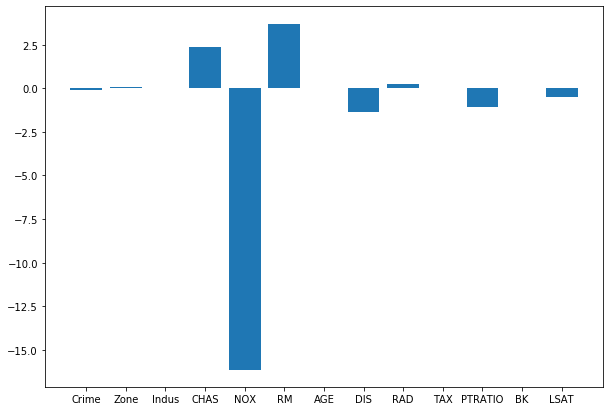

In [117]:
plt.figure(figsize=(10,7))
plt.bar(labels, reg.coef_)

# Random Forest

In [96]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error = ', mse )
print('R^2 score = ', r2)

Mean Squared Error =  18.60512309803923
R^2 score =  0.7715156607153403


<BarContainer object of 13 artists>

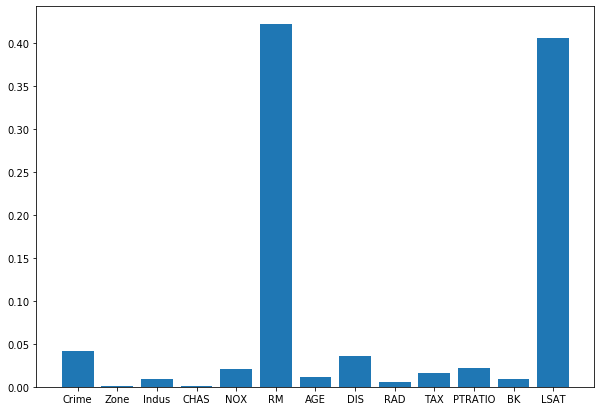

In [114]:
plt.figure(figsize=(10,7))
plt.bar(labels, forest.feature_importances_)
